# 8장. 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [1]:
!pip install matplotlib  #최초 한번만 설치:Anaconda에 설치됨

In [2]:
!pip install wordcloud  #최초 한번만 설치:Anaconda에 설치됨

In [3]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#### - 아나콘다에 nltk 가 기본으로 설치되어있으므로, pip으로 설치할 필요없음.
####    하지만, 최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [4]:
import nltk     # nltk.download() 를 하기위해, import 함.

In [5]:
nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 책에 있는 결과 화면과 다를수 있습니다.☺ -

In [12]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['8장_data/myCabinetExcelData (4).xls',
 '8장_data/myCabinetExcelData (8).xls',
 '8장_data/myCabinetExcelData (9).xls',
 '8장_data/myCabinetExcelData (5).xls',
 '8장_data/myCabinetExcelData (2).xls',
 '8장_data/myCabinetExcelData (3).xls',
 '8장_data/myCabinetExcelData (1).xls',
 '8장_data/myCabinetExcelData (6).xls',
 '8장_data/myCabinetExcelData.xls',
 '8장_data/myCabinetExcelData (7).xls']

In [13]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
95,NaN,96,Big data analytics sentiment: US-China reactio...,"LaBrie, Ryan C.; Steinke, Gerhard H.; Li, Xian...","Elsevier Science B.V., Amsterdam.",2018
96,NaN,97,Big Data In the first of three articles on Big...,unknown,FENMAN LTD,2014
97,NaN,98,Big data driven lithium-ion battery modeling m...,"Li, Shuangqi; He, Hongwen; Li, Jianwei","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,Big data in multiple sclerosis: development of...,unknown,The Society,2015


In [14]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
995,NaN,96,Efficient data management tools for the hetero...,"Alekseev, A. A.; Osipova, V. V.; Ivanov, M. A....",Springer Science + Business Media,2016
996,NaN,97,Securing Big Data Provenance for Auditors: The...,"Appelbaum, Deniz",Strategic and Emerging Technologies Section of...,2016
997,NaN,98,Demystifying big data: Anatomy of big data dev...,"Shin, Dong-Hee","Elsevier Science B.V., Amsterdam.",2016
998,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014


In [15]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [16]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0                      Big data promises big opportunity
1      Big data vs accurate data in health research: ...
2      Data stream classification and big data analytics
3      Big Data and Privacy: Why Public Organizations...
4      Big data on individuals in the architectural d...
                             ...                        
995    Efficient data management tools for the hetero...
996    Securing Big Data Provenance for Auditors: The...
997    Demystifying big data: Anatomy of big data dev...
998    Assessing Whether “Big Data” Solutions Provide...
999    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 1000, dtype: object

In [17]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [18]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [19]:
print(words)  #출력하여 내용 확인

[['big', 'data', 'promise', 'big', 'opportunity'], ['big', 'data', 'v', 'accurate', 'data', 'health', 'research', 'large', 'scale', 'physical', 'activity', 'monitoring', 'smartphones', 'wearable', 'device', 'risk', 'unconscious', 'bias'], ['data', 'stream', 'classification', 'big', 'data', 'analytics'], ['big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data'], ['big', 'data', 'individual', 'architectural', 'design', 'process', 'combining', 'individual', 'data', 'architect', 'toolset'], ['big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid'], ['big', 'data', 'benchmark', 'big', 'd'], ['big', 'data', 'ownership', 'data', 'recent', 'development', 'europe'], ['big', 'survey', 'big', 'data', 'centre'], ['big', 'data', 'approach', 'trauma', 'outcome', 'prediction', 'autonomous', 'resuscitation', 'shiming', 'yang', 'mary', 'njoku', 'colin', 'f', 'mackenzie', 'discus', 'massive', 'clinical', 'data', 'used', 'learning', 'prediction', 'model', 'level', 'trauma',

In [20]:
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['big', 'data', 'promise', 'big', 'opportunity', 'big', 'data', 'v', 'accurate', 'data', 'health', 'research', 'large', 'scale', 'physical', 'activity', 'monitoring', 'smartphones', 'wearable', 'device', 'risk', 'unconscious', 'bias', 'data', 'stream', 'classification', 'big', 'data', 'analytics', 'big', 'data', 'privacy', 'public', 'organization', 'adopt', 'big', 'data', 'big', 'data', 'individual', 'architectural', 'design', 'process', 'combining', 'individual', 'data', 'architect', 'toolset', 'big', 'data', 'operation', 'basis', 'benchmarking', 'data', 'grid', 'big', 'data', 'benchmark', 'big', 'd', 'big', 'data', 'ownership', 'data', 'recent', 'development', 'europe', 'big', 'survey', 'big', 'data', 'centre', 'big', 'data', 'approach', 'trauma', 'outcome', 'prediction', 'autonomous', 'resuscitation', 'shiming', 'yang', 'mary', 'njoku', 'colin', 'f', 'mackenzie', 'discus', 'massive', 'clinical', 'data', 'used', 'learning', 'prediction', 'model', 'level', 'trauma', 'centre', 'support

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [21]:
count = Counter(words2)

count   #출력하여 내용 확인

Counter({'big': 1354,
         'data': 1645,
         'promise': 13,
         'opportunity': 31,
         'v': 3,
         'accurate': 3,
         'health': 37,
         'research': 38,
         'large': 18,
         'scale': 12,
         'physical': 3,
         'activity': 2,
         'monitoring': 7,
         'smartphones': 1,
         'wearable': 2,
         'device': 10,
         'risk': 12,
         'unconscious': 1,
         'bias': 3,
         'stream': 8,
         'classification': 8,
         'analytics': 137,
         'privacy': 17,
         'public': 11,
         'organization': 3,
         'adopt': 1,
         'individual': 6,
         'architectural': 1,
         'design': 14,
         'process': 19,
         'combining': 3,
         'architect': 1,
         'toolset': 1,
         'operation': 6,
         'basis': 1,
         'benchmarking': 2,
         'grid': 3,
         'benchmark': 2,
         'd': 1,
         'ownership': 1,
         'recent': 4,
         'development

In [22]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
science : 50
system : 50
management : 48
challenge : 47
approach : 44
mining : 40
research : 38
new : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
information : 26
framework : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
deal : 23
network : 23
quality : 23
knowledge : 22
review : 22
use : 22
efficient : 22
era : 22
storage : 21
healthcare : 21
perspective : 21
service : 21
open : 20
process : 19
survey : 19
making : 19
platform : 19
large : 18
decision : 18
business : 18


#### 여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [23]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

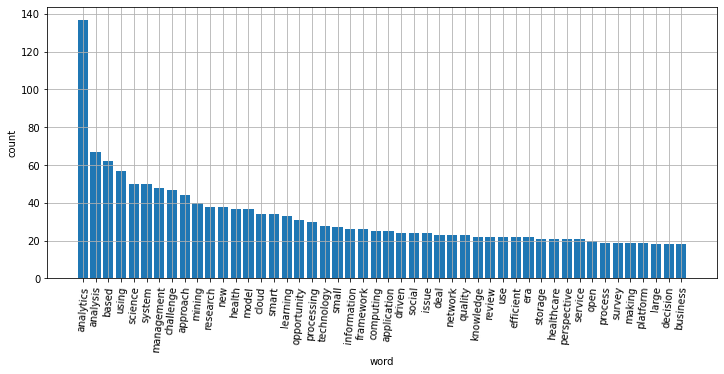

In [24]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


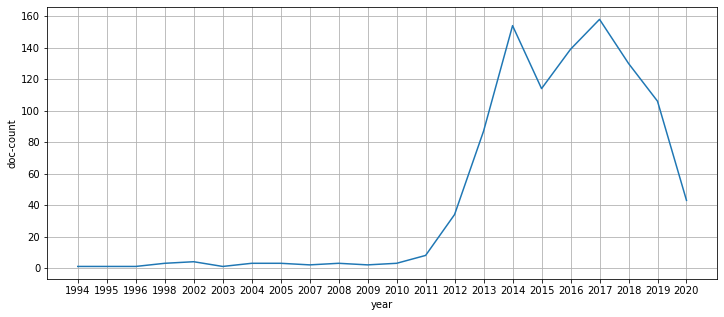

In [26]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

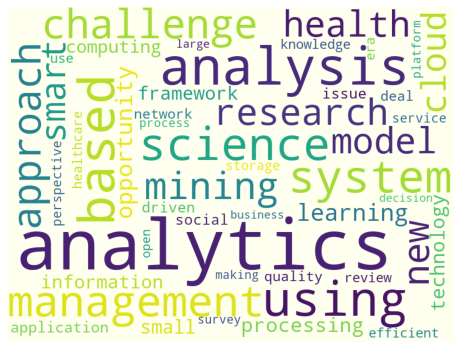

In [27]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [28]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")